<a href="https://colab.research.google.com/github/giginar/Machinelearning/blob/main/yigit_kucukcinar_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Imports

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [135]:
df = pd.read_csv("boston_house_prices.csv")

In [136]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [137]:
df.shape

(506, 14)

In [138]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.533202
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.196353
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


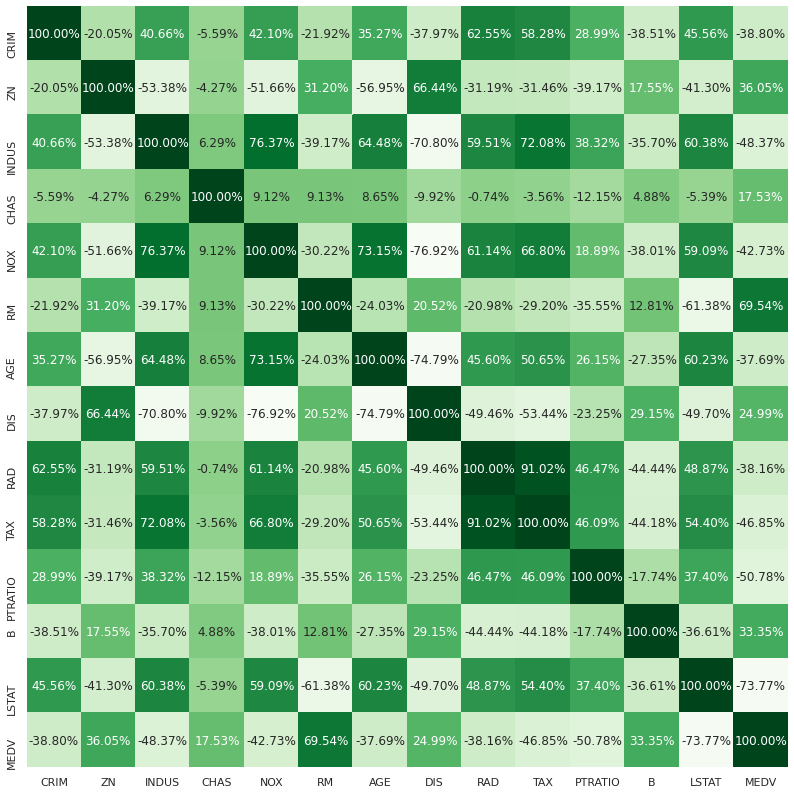

In [139]:
corr = df.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar=False, square= True, fmt='.2%', annot=True, cmap='Greens')

From the beginning, with the correlation map, I thinking checking the correlation of the variables with crim rate is a good way to eleminate some data. So, we can clearly see what variables are not correlated at all, like ZN, CHAS, RM, PTRATIO.

Also from the map; INDUS, NOX, AGE, DIS, RAD, TAX, B, LSTAT,MEDV look correlated with crime rate so, i will build first my model on them. From there, I will take a look at the results and eliminate more features.

###Preparing the Dataframe

In [140]:
df['CRIM'].median()

0.25651

There is no null in the data.
for CRIM(crim rate) the median is 0.25651 so we will control if our CRIM value is above(1) or below(0) this value.

In [142]:
over_median_crim = np.where(df['CRIM']>=df['CRIM'].median(),1,0)
df2 = pd.DataFrame(over_median_crim,columns = ['CrimeRate'])

In [143]:
df = pd.concat([df,df2],axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CrimeRate
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0


In [144]:
df= df.drop('CRIM',axis=1)

In [145]:
df.head()

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CrimeRate
0,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
3,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0
4,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0


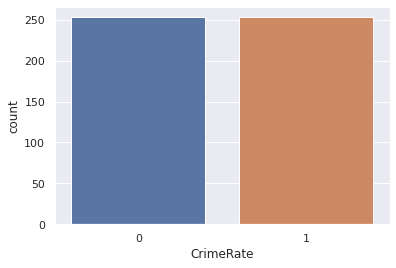

In [146]:
sns.countplot(x='CrimeRate',data=df)

In [147]:
percentage = len(df[df['CrimeRate']==1])/len(df)
print('Crime_Rate more than median:  %.2f' % (df[df['CrimeRate']==1]['CrimeRate'].count()/len(df)))
print('Crime_Rate less than median:  %.2f' % (df[df['CrimeRate']==0]['CrimeRate'].count()/len(df)))

Crime_Rate more than median:  0.50
Crime_Rate less than median:  0.50


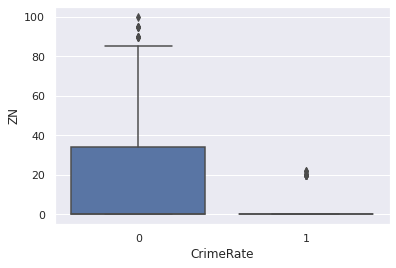

In [35]:
sns.boxplot(x='CrimeRate',y='ZN',data=df)

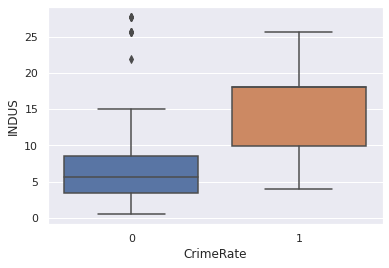

In [ ]:
sns.boxplot(x='CrimeRate',y='INDUS',data=df)

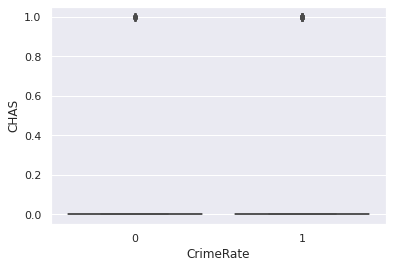

In [ ]:
sns.boxplot(x='CrimeRate',y='CHAS',data=df)

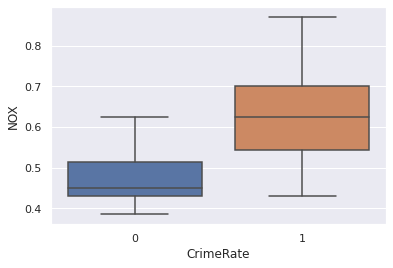

In [ ]:
sns.boxplot(x='CrimeRate',y='NOX',data=df)

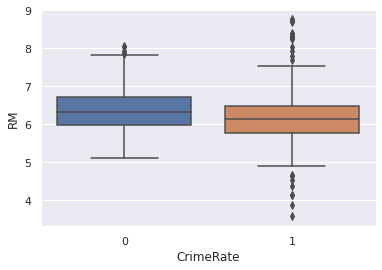

In [ ]:
sns.boxplot(x='CrimeRate',y='RM',data=df)

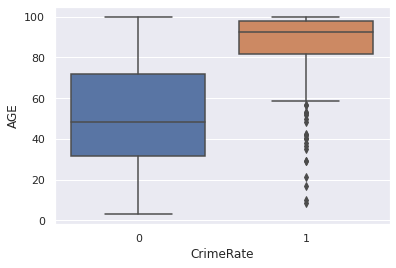

In [ ]:
sns.boxplot(x='CrimeRate',y='AGE',data=df)

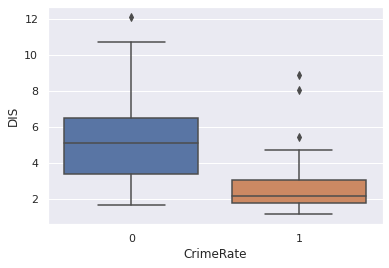

In [ ]:
sns.boxplot(x='CrimeRate',y='DIS',data=df)

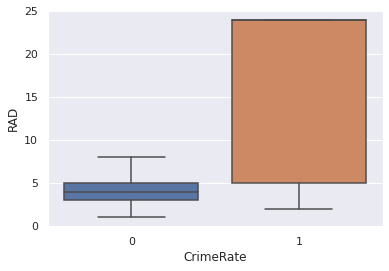

In [ ]:
sns.boxplot(x='CrimeRate',y='RAD',data=df)

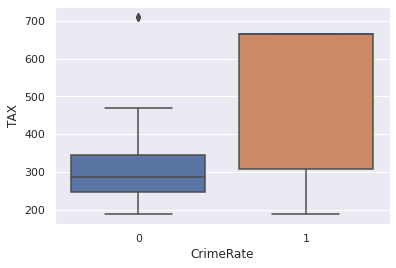

In [ ]:
sns.boxplot(x='CrimeRate',y='TAX',data=df)

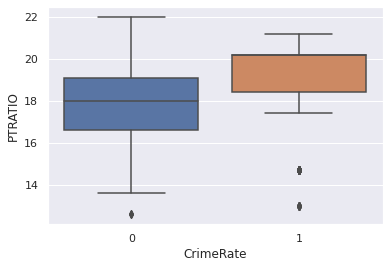

In [ ]:
sns.boxplot(x='CrimeRate',y='PTRATIO',data=df)

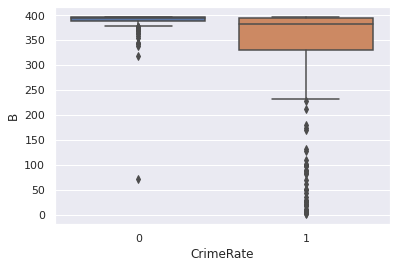

In [ ]:
sns.boxplot(x='CrimeRate',y='B',data=df)

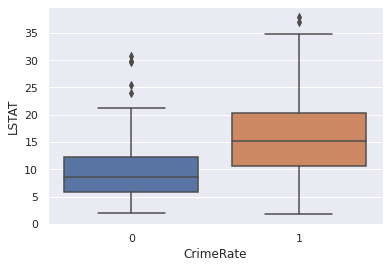

In [ ]:
sns.boxplot(x='CrimeRate',y='LSTAT',data=df)

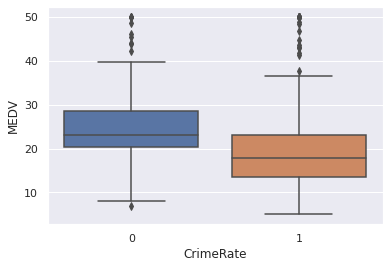

In [ ]:
sns.boxplot(x='CrimeRate',y='MEDV',data=df)

In [148]:
df.columns

Index(['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'CrimeRate'],
      dtype='object')

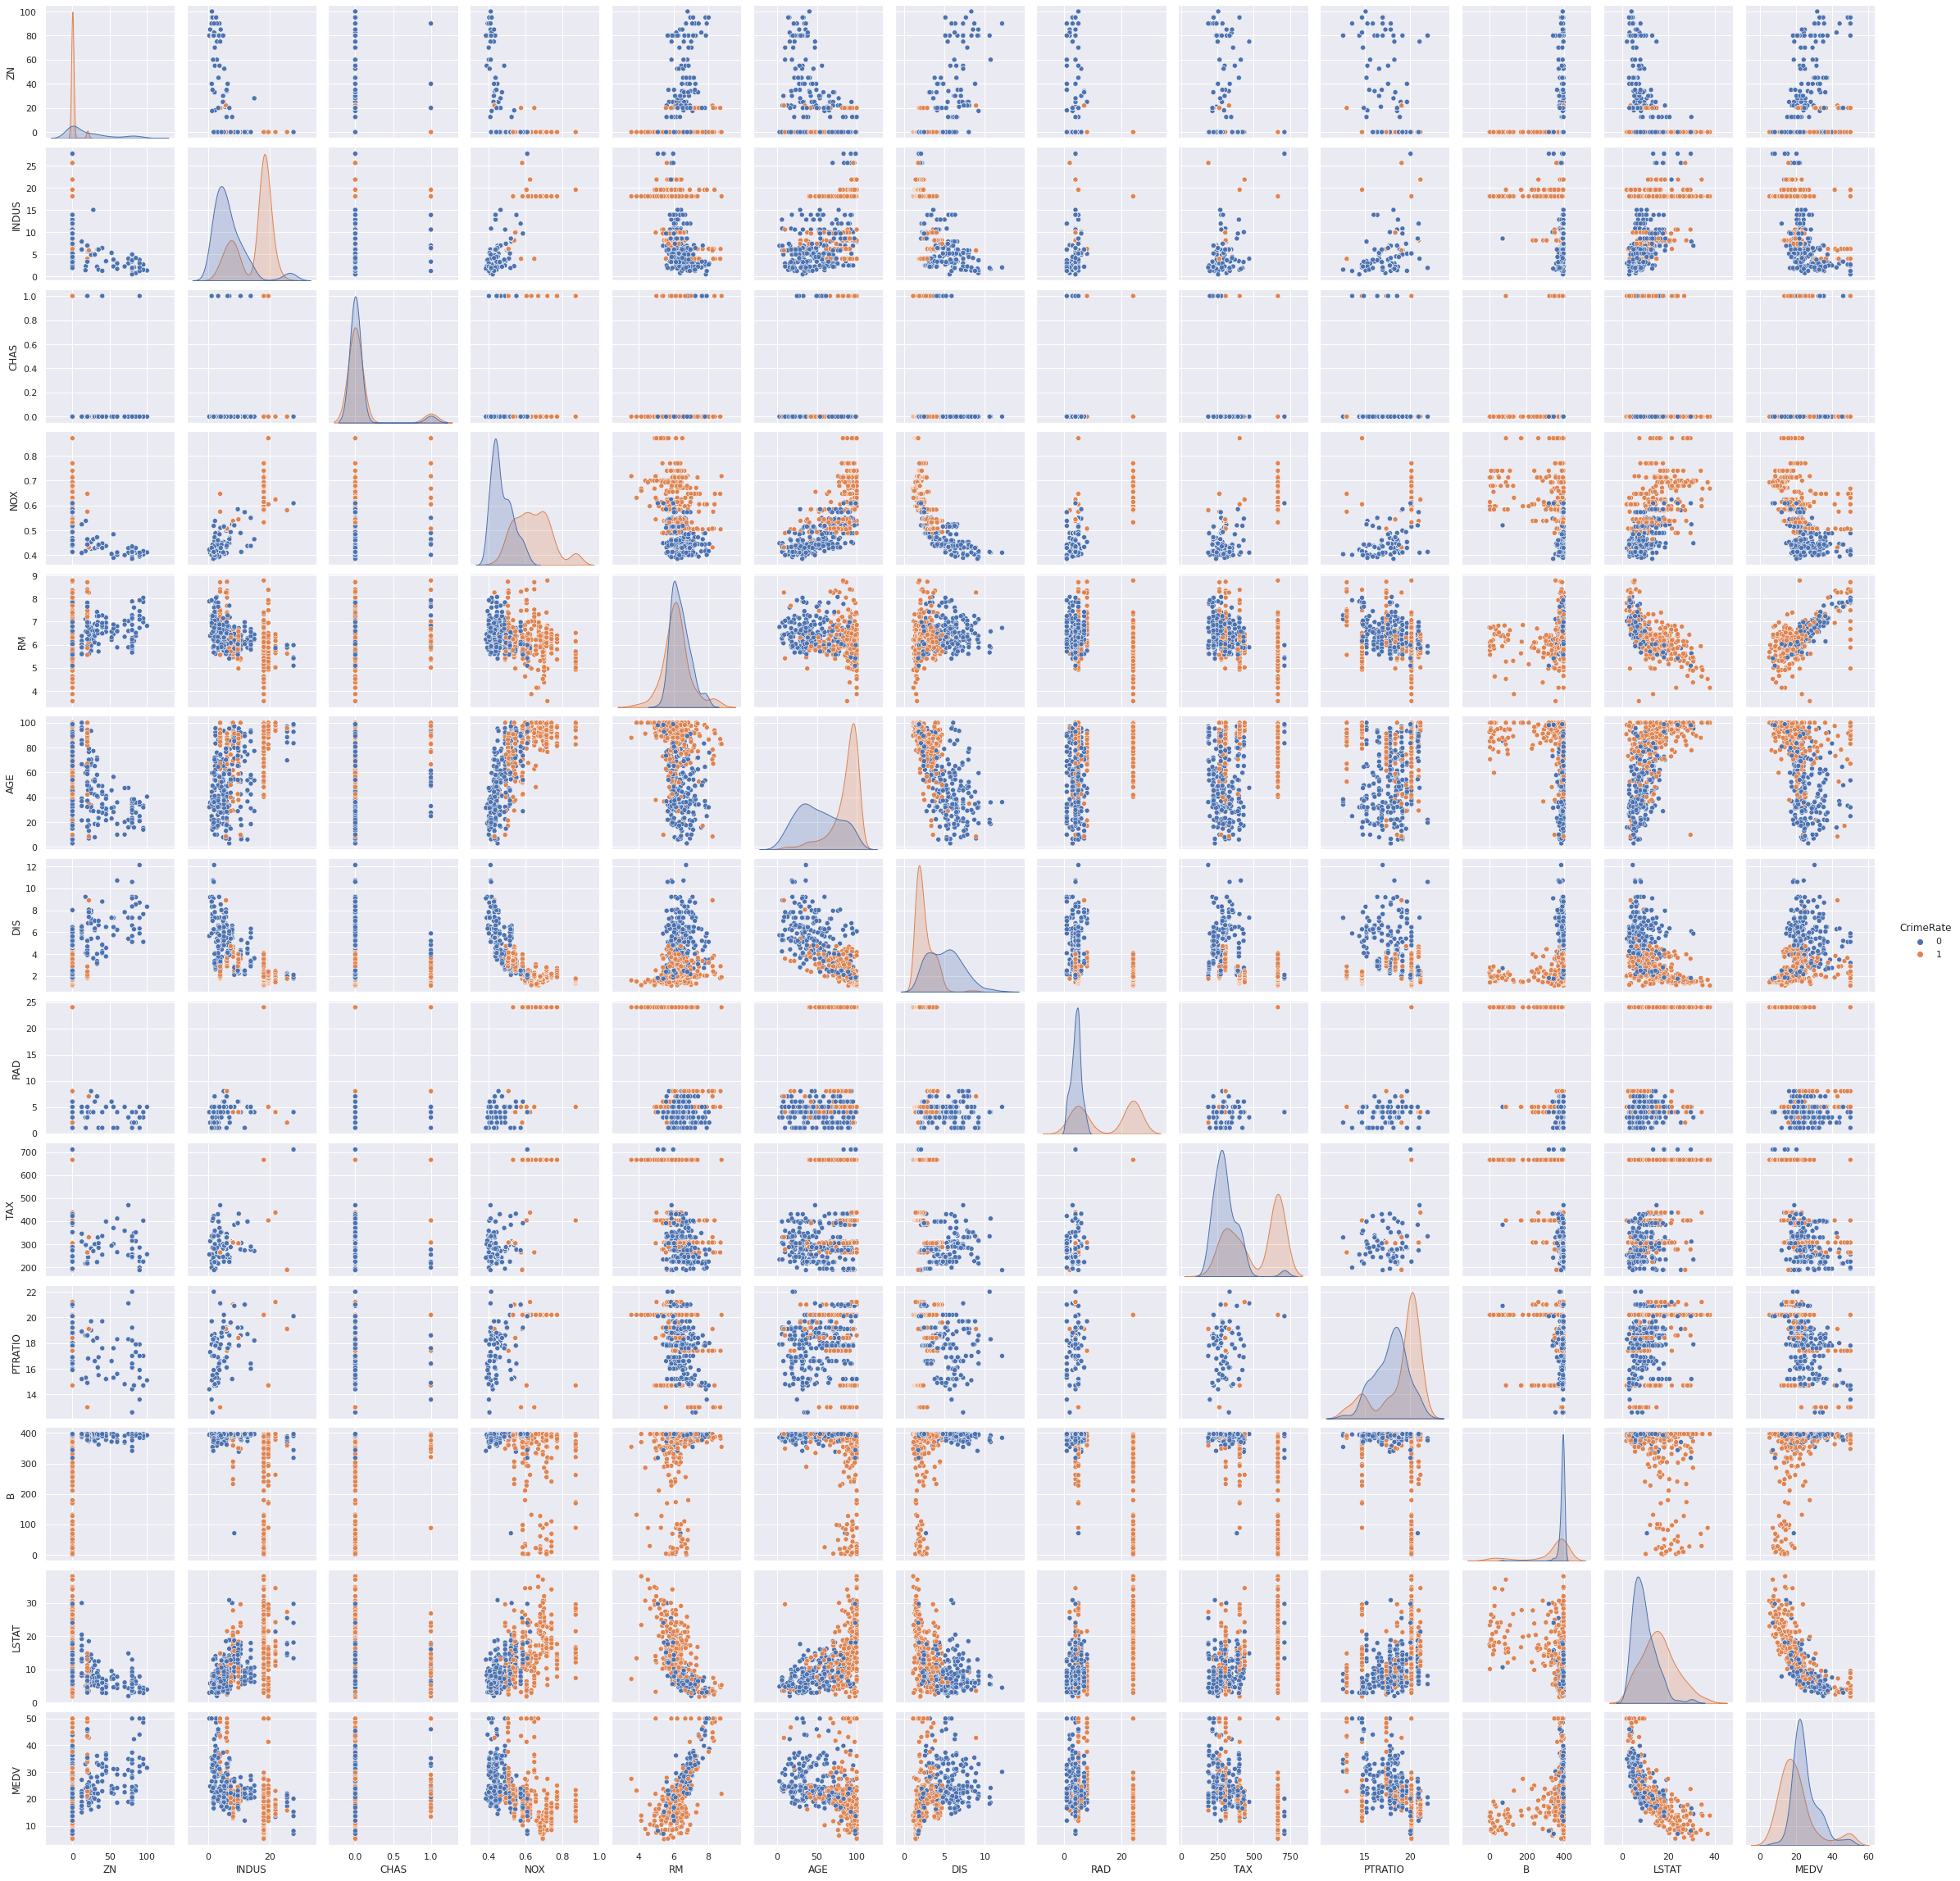

In [ ]:
sns.pairplot(df[['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'CrimeRate']],hue='CrimeRate')

I wanted to check the correlations from the boxplots and pairplot too, i will still go with my first plan;  ZN, CHAS, RM, PTRATIO will drop.

In [149]:
df = df.drop(['ZN','CHAS','RM','PTRATIO'],axis=1)
df.head()

,INDUS,NOX,AGE,DIS,RAD,TAX,B,LSTAT,MEDV,CrimeRate
0,2.31,0.538,65.2,4.0900,1,296,396.90,4.98,24.0,0
1,7.07,0.469,78.9,4.9671,2,242,396.90,9.14,21.6,0
2,7.07,0.469,61.1,4.9671,2,242,392.83,4.03,34.7,0
3,2.18,0.458,45.8,6.0622,3,222,394.63,2.94,33.4,0
4,2.18,0.458,54.2,6.0622,3,222,396.90,5.33,36.2,0


In [150]:
df.describe()

,INDUS,NOX,AGE,DIS,RAD,TAX,B,LSTAT,MEDV,CrimeRate
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,11.136779,0.554695,68.574901,3.795043,9.549407,408.237154,356.674032,12.653063,22.533202,0.500000
std,6.860353,0.115878,28.148861,2.105710,8.707259,168.537116,91.294864,7.141062,9.196353,0.500495
min,0.460000,0.385000,2.900000,1.129600,1.000000,187.000000,0.320000,1.730000,5.000000,0.000000
25%,5.190000,0.449000,45.025000,2.100175,4.000000,279.000000,375.377500,6.950000,17.025000,0.000000
50%,9.690000,0.538000,77.500000,3.207450,5.000000,330.000000,391.440000,11.360000,21.200000,0.500000
75%,18.100000,0.624000,94.075000,5.188425,24.000000,666.000000,396.225000,16.955000,25.000000,1.000000
max,27.740000,0.871000,100.000000,12.126500,24.000000,711.000000,396.900000,37.970000,50.000000,1.000000


###Building model with Scikit

In [151]:
from sklearn.model_selection import train_test_split

In [152]:
X = df.drop('CrimeRate',axis=1)
y = df['CrimeRate']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [153]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [154]:
logmodel.coef_

array([[ 0.06173515,  0.04378867,  0.02737227, -0.40830188,  0.55664409,
        -0.00478775, -0.01348899,  0.07623701,  0.05631588]])

In [155]:
logmodel.intercept_

array([-0.00715893])

In [156]:
predictions = logmodel.predict(X_test)

From the coefficients results; i see that INDUS, NOX, AGE, B, TAX, LSTAT and MEDV is less effective compared to other variables, so i will drop them to make the model more efficient.

In [157]:
df_Another_Try = df.drop(["B", "TAX"],axis=1)
df_Best_Values = df.drop(["INDUS", "AGE", "B", "TAX", "LSTAT", "MEDV"],axis=1)
df = df.drop(["INDUS", "NOX", "AGE", "B", "TAX", "LSTAT", "MEDV"],axis=1)
df.head()

,DIS,RAD,CrimeRate
0,4.0900,1,0
1,4.9671,2,0
2,4.9671,2,0
3,6.0622,3,0
4,6.0622,3,0


In [158]:
df.describe()

,DIS,RAD,CrimeRate
count,506.000000,506.000000,506.000000
mean,3.795043,9.549407,0.500000
std,2.105710,8.707259,0.500495
min,1.129600,1.000000,0.000000
25%,2.100175,4.000000,0.000000
50%,3.207450,5.000000,0.500000
75%,5.188425,24.000000,1.000000
max,12.126500,24.000000,1.000000


In [159]:
X = df.drop('CrimeRate',axis=1)
y = df['CrimeRate']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [160]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [161]:
logmodel.coef_

array([[-0.77099837,  0.36317761]])

In [162]:
logmodel.intercept_

array([0.4062437])

In [163]:
predictions = logmodel.predict(X_test)

###Classification Report

In [164]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [165]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85        73
           1       0.90      0.80      0.85        79

    accuracy                           0.85       152
   macro avg       0.85      0.85      0.85       152
weighted avg       0.85      0.85      0.85       152



###Confusion Matrix

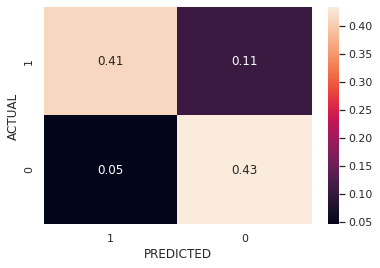

In [166]:
# with percentages:
cm = confusion_matrix( y_test, predictions, [1,0] )
sns.heatmap(cm/len(y_test), annot=True,  fmt='.2f', xticklabels = ["1", "0"] , 
                yticklabels = ["1", "0"] )
plt.ylabel('ACTUAL')
plt.xlabel('PREDICTED')
plt.show()

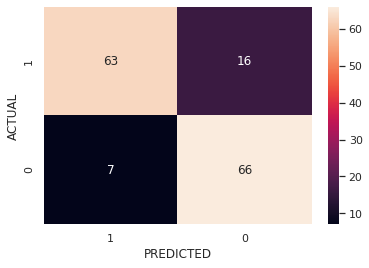

In [167]:
# with counts:
cm = confusion_matrix( y_test, predictions, [1,0] )
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels = ["1", "0"] , 
                yticklabels = ["1", "0"] )
plt.ylabel('ACTUAL')
plt.xlabel('PREDICTED')
plt.show()

###ROC Curve

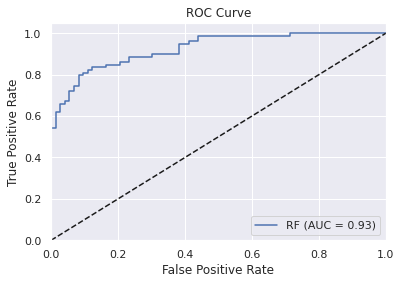

In [168]:
from sklearn.metrics import roc_curve, auc

# Determine the false positive and true positive rates for ROC
fpr, tpr, _ = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='RF (AUC = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [169]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,logmodel.predict_proba(X_test)[:,1])

0.9254378359632391

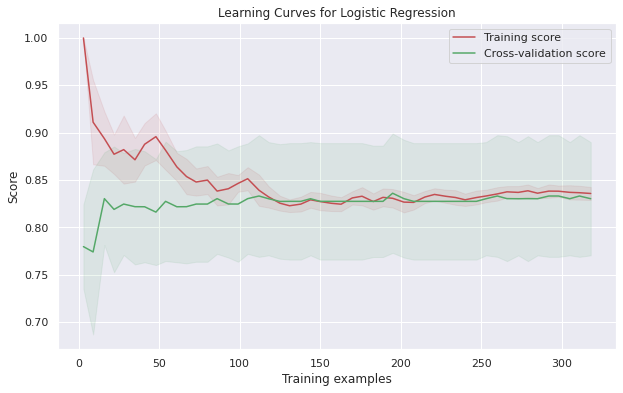

In [170]:
from sklearn import model_selection
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
# Put the following in a separate .py file and then use   %load filename.py   for importing it
#Ref: http://scikit-learn.org/stable/modules/learning_curve.html
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(0.01, 1.0, 50)):
    plt.figure(figsize=(10,6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, '-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, '-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.grid("on")
    return plt

title = 'Learning Curves for Logistic Regression'
estimator = LogisticRegression()
kfold = model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=101)
plot_learning_curve(estimator, title, X_train, y_train, cv=kfold)
plt.show()

###A try here just to see an alternative model (df_Another_Try)

In [104]:
df_Another_Try.head()

,INDUS,NOX,AGE,DIS,RAD,LSTAT,MEDV,CrimeRate
0,2.31,0.538,65.2,4.0900,1,4.98,24.0,0
1,7.07,0.469,78.9,4.9671,2,9.14,21.6,0
2,7.07,0.469,61.1,4.9671,2,4.03,34.7,0
3,2.18,0.458,45.8,6.0622,3,2.94,33.4,0
4,2.18,0.458,54.2,6.0622,3,5.33,36.2,0


In [105]:
df_Another_Try.describe()

,INDUS,NOX,AGE,DIS,RAD,LSTAT,MEDV,CrimeRate
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,11.136779,0.554695,68.574901,3.795043,9.549407,12.653063,22.533202,0.500000
std,6.860353,0.115878,28.148861,2.105710,8.707259,7.141062,9.196353,0.500495
min,0.460000,0.385000,2.900000,1.129600,1.000000,1.730000,5.000000,0.000000
25%,5.190000,0.449000,45.025000,2.100175,4.000000,6.950000,17.025000,0.000000
50%,9.690000,0.538000,77.500000,3.207450,5.000000,11.360000,21.200000,0.500000
75%,18.100000,0.624000,94.075000,5.188425,24.000000,16.955000,25.000000,1.000000
max,27.740000,0.871000,100.000000,12.126500,24.000000,37.970000,50.000000,1.000000


In [106]:
X2 = df_Another_Try.drop('CrimeRate',axis=1)
y2 = df_Another_Try['CrimeRate']


X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=101)

In [107]:
from sklearn.linear_model import LogisticRegression

logmodel2 = LogisticRegression()
logmodel2.fit(X_train2,y_train2)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [108]:
logmodel2.coef_

array([[ 0.01171462,  1.59439456,  0.02609027, -0.36699696,  0.37501928,
         0.08458981,  0.06179492]])

In [109]:
logmodel2.intercept_

array([-6.44862598])

In [110]:
predictions2 = logmodel2.predict(X_test2)

In [111]:
print(classification_report(y_test2,predictions2))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85        73
           1       0.91      0.78      0.84        79

    accuracy                           0.85       152
   macro avg       0.85      0.85      0.85       152
weighted avg       0.86      0.85      0.85       152



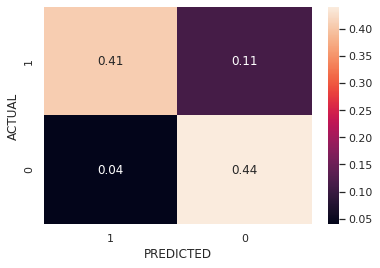

In [112]:
# with percentages:
cm = confusion_matrix( y_test2, predictions2, [1,0] )
sns.heatmap(cm/len(y_test), annot=True,  fmt='.2f', xticklabels = ["1", "0"] , 
                yticklabels = ["1", "0"] )
plt.ylabel('ACTUAL')
plt.xlabel('PREDICTED')
plt.show()

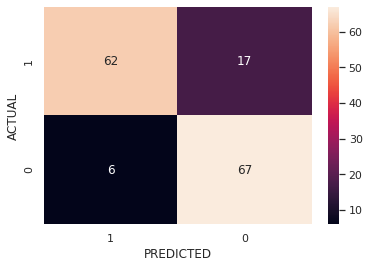

In [113]:
# with counts:
cm = confusion_matrix( y_test2, predictions2, [1,0] )
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels = ["1", "0"] , 
                yticklabels = ["1", "0"] )
plt.ylabel('ACTUAL')
plt.xlabel('PREDICTED')
plt.show()

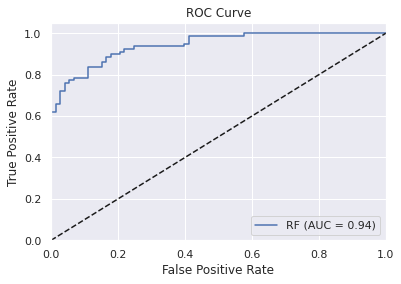

In [114]:
from sklearn.metrics import roc_curve, auc

# Determine the false positive and true positive rates for ROC
fpr, tpr, _ = roc_curve(y_test2, logmodel2.predict_proba(X_test2)[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='RF (AUC = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [115]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test2,logmodel2.predict_proba(X_test2)[:,1])

0.9424310733483614

Okey, this model is better than the other, so i will do one last try with only NOX, DIS and RAD as features.

### Last try most probably the most efficient one

In [171]:
df_Best_Values.head()

,NOX,DIS,RAD,CrimeRate
0,0.538,4.0900,1,0
1,0.469,4.9671,2,0
2,0.469,4.9671,2,0
3,0.458,6.0622,3,0
4,0.458,6.0622,3,0


In [172]:
df_Best_Values.describe()

,NOX,DIS,RAD,CrimeRate
count,506.000000,506.000000,506.000000,506.000000
mean,0.554695,3.795043,9.549407,0.500000
std,0.115878,2.105710,8.707259,0.500495
min,0.385000,1.129600,1.000000,0.000000
25%,0.449000,2.100175,4.000000,0.000000
50%,0.538000,3.207450,5.000000,0.500000
75%,0.624000,5.188425,24.000000,1.000000
max,0.871000,12.126500,24.000000,1.000000


In [173]:
X = df_Best_Values.drop('CrimeRate',axis=1)
y = df_Best_Values['CrimeRate']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [174]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [175]:
logmodel.coef_

array([[ 1.98188214, -0.67765737,  0.35384049]])

In [176]:
logmodel.intercept_

array([-0.94509733])

In [177]:
predictions = logmodel.predict(X_test)

In [178]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.86        73
           1       0.91      0.81      0.86        79

    accuracy                           0.86       152
   macro avg       0.87      0.86      0.86       152
weighted avg       0.87      0.86      0.86       152



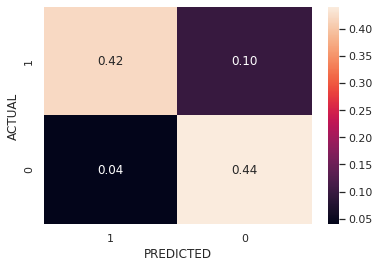

In [179]:
# with percentages:
cm = confusion_matrix( y_test, predictions, [1,0] )
sns.heatmap(cm/len(y_test), annot=True,  fmt='.2f', xticklabels = ["1", "0"] , 
                yticklabels = ["1", "0"] )
plt.ylabel('ACTUAL')
plt.xlabel('PREDICTED')
plt.show()

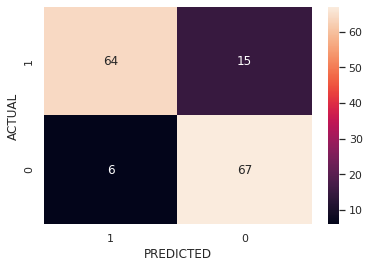

In [180]:
# with counts:
cm = confusion_matrix( y_test, predictions, [1,0] )
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels = ["1", "0"] , 
                yticklabels = ["1", "0"] )
plt.ylabel('ACTUAL')
plt.xlabel('PREDICTED')
plt.show()

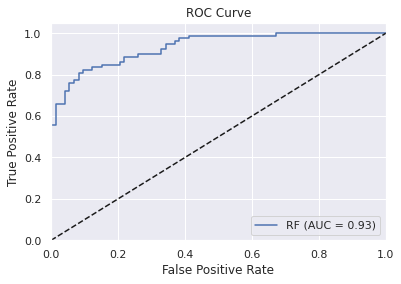

In [181]:
from sklearn.metrics import roc_curve, auc

# Determine the false positive and true positive rates for ROC
fpr, tpr, _ = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='RF (AUC = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [182]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,logmodel.predict_proba(X_test)[:,1])

0.9335876538928386

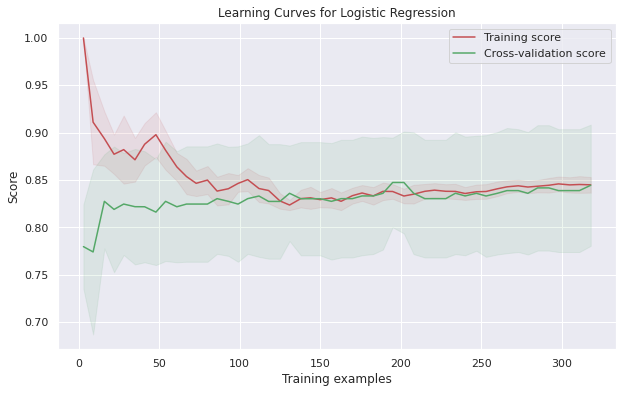

In [183]:
from sklearn import model_selection
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
# Put the following in a separate .py file and then use   %load filename.py   for importing it
#Ref: http://scikit-learn.org/stable/modules/learning_curve.html
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(0.01, 1.0, 50)):
    plt.figure(figsize=(10,6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, '-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, '-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.grid("on")
    return plt

title = 'Learning Curves for Logistic Regression'
estimator = LogisticRegression()
kfold = model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=101)
plot_learning_curve(estimator, title, X_train, y_train, cv=kfold)
plt.show()

Although, ROC value is lower than the second model, i will go with the third model because the accuracy and precision values are better than both models

train and test values are resetted at the last run of the latest model, so kNN values below are the same from the third model above.

###kNN Regression

In [184]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [185]:
scaled_features = scaler.transform(X_train)

In [186]:
scaled_features

array([[-1.23978163,  0.6694797 , -0.65695947],
       [ 0.65000206, -1.22833712,  1.61972828],
       [ 0.22790054,  0.12358352,  1.61972828],
       ...,
       [-0.37007662,  0.91036614, -0.54312509],
       [-0.29093258,  1.20684549, -0.54312509],
       [-1.28462992,  3.3799611 , -0.65695947]])

In [187]:
X_train = pd.DataFrame(scaled_features,columns=X_train.columns)

==> KNN classifier with k=1

In [188]:
from sklearn.neighbors import KNeighborsClassifier

In [189]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [190]:
X_test= pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)
pred = knn.predict(X_test)

In [191]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        73
           1       0.93      0.96      0.94        79

    accuracy                           0.94       152
   macro avg       0.94      0.94      0.94       152
weighted avg       0.94      0.94      0.94       152



==> KNN classifier with k=3

In [192]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        73
           1       0.93      0.95      0.94        79

    accuracy                           0.93       152
   macro avg       0.93      0.93      0.93       152
weighted avg       0.93      0.93      0.93       152



In [194]:
from sklearn import metrics

In [195]:
error_rate = []
for k in range(1,150):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  pred_k = knn.predict(X_test)
  error_rate.append(np.mean(pred_k!=y_test))
  #error_rate.append(np.sqrt(metrics.mean_squared_error(y_test,pred_k)))

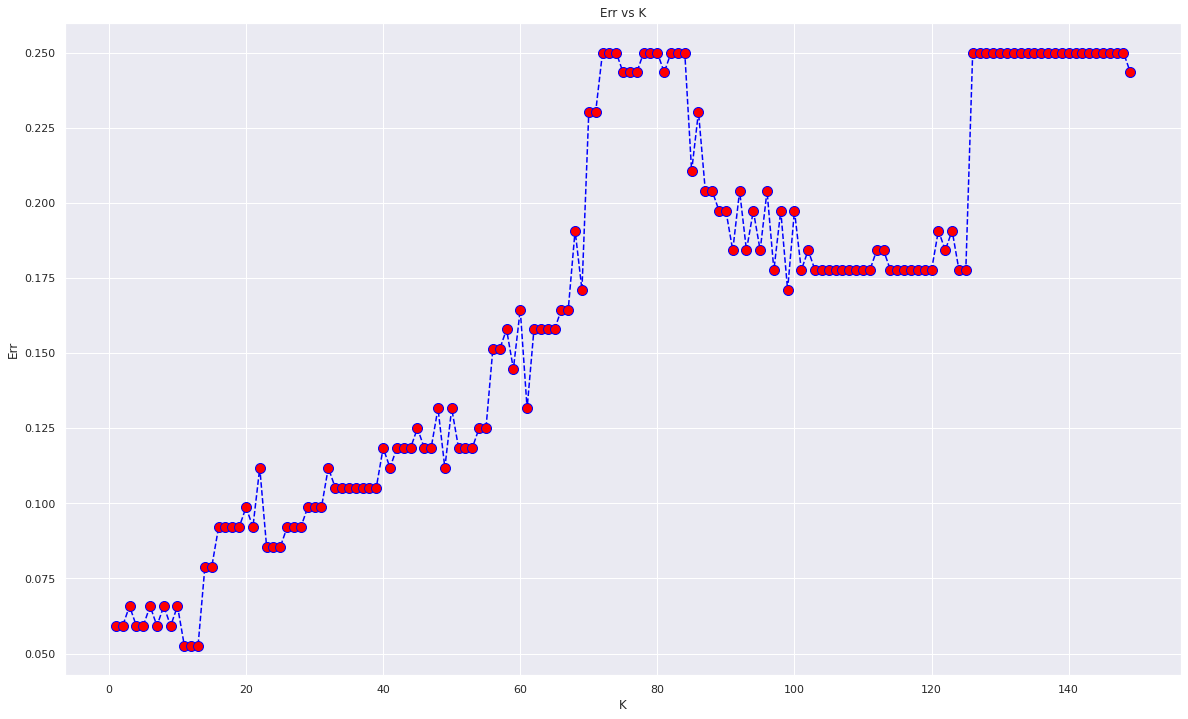

In [196]:
plt.figure(figsize=(20,12))
plt.plot(range(1,150),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',
         markersize=10)
plt.title('Err vs K')
plt.xlabel('K')
plt.ylabel('Err')
plt.show()

In [ ]:
#k=11 looks fine, error rate is low there.

In [202]:
kreg = KNeighborsClassifier(n_neighbors=103)
kreg.fit(X_train,y_train)
preds = kreg.predict(X_test)
print("==> k=103")
print("r2:",metrics.r2_score(y_test,preds))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,preds)))

==> k=103
r2: 0.2883648344026356
RMSE: 0.4214636152117623


In [203]:
kreg = KNeighborsClassifier(n_neighbors=11)
kreg.fit(X_train,y_train)
preds = kreg.predict(X_test)
print("==> k=11")
print(classification_report(y_test,preds))
print("r2:",metrics.r2_score(y_test,preds))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,preds)))

==> k=11
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        73
           1       0.96      0.94      0.95        79

    accuracy                           0.95       152
   macro avg       0.95      0.95      0.95       152
weighted avg       0.95      0.95      0.95       152

r2: 0.7891451361192994
RMSE: 0.22941573387056177


k=11 looks fine with the model. Higher r2 and lower RMSE as expected from the graphs above.

###Comparison of both Logistic and kNN regression results.

Logistic Resgession => Accuracy = 0.86 | precision values 0/1 = 0.82/0.91
kNN Resgession => Accuracy = 0.95 | precision values 0/1 = 0.93/0.96

With respect to the results, kNN looks better with all aspects. So, i can say kNN predicted better. 